In [2]:
import os, json, io, nltk, re
from collections import Counter 
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
path_to_folder = "C:/Users/monte/_Olesya/Диплом/Основная папка/задание/Distances_between_articles_cat_NLP"
categ = json.load(open("C:/Users/monte/_Olesya/Диплом/Основная папка/задание/NatLangProc_Categ.json", "r", encoding="utf-8"))

In [9]:
@dataclass
class dist_to_root_art:
    idx: int
    art_name: str    
    distance: float
        
def my_comp_distance(x):
    return x.distance

In [10]:
def art_sum_dist (name):
    art_dict = json.load(open(path_to_folder + "/" + name + ".json", "r", encoding="utf-8"))
    sum_list = []
    for i in art_dict:
        sum_el = 0
        for j in art_dict[i]["distances"]:
            sum_el += art_dict[i]["distances"][j]["distance"]
        c = []
        c = [i, art_dict[i]["art_name"], sum_el]
        sum_list.append(c)
    return sum_list


def main_art (name):
    return categ[name][3]

In [11]:
def print_cat_dist_4 (name, name_json):
    art_and_sum_table = pd.DataFrame(art_sum_dist(name_json), columns = ['Index_in_cat', 'Name_of_art', 'Sum_of_coef'])
    
    for i, bins_i in enumerate([10, 15, 20, 25]):

        ax = plt.subplot(2, 2, i + 1)

        ax.hist(art_and_sum_table['Sum_of_coef'], bins = bins_i, color = 'blue', edgecolor = 'black')

        ax.set_title('Histogram with Bins (number) = %d' % bins_i)
        ax.set_xlabel('Sum_of_coef')
        ax.set_ylabel('Articles')

    plt.tight_layout()
    plt.show()

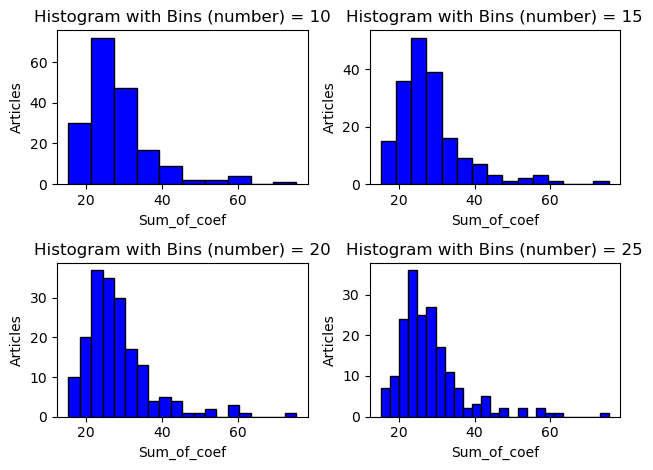

In [12]:
print_cat_dist_4("Natural language processing", "NLP_distances_result")

In [13]:
def print_cat_dist_1 (name, name_json):
    art_and_sum_table = pd.DataFrame(art_sum_dist(name_json), columns = ['Index_in_cat', 'Name_of_art', 'Sum_of_coef'])
    
    plt.hist(art_and_sum_table['Sum_of_coef'], bins = 25, color = 'blue', edgecolor = 'black')

    plt.title('Histogram with Bins (number) = %d' % 25)
    plt.xlabel('Sum_of_coef')
    plt.ylabel('Articles')  
    
    plt.show()

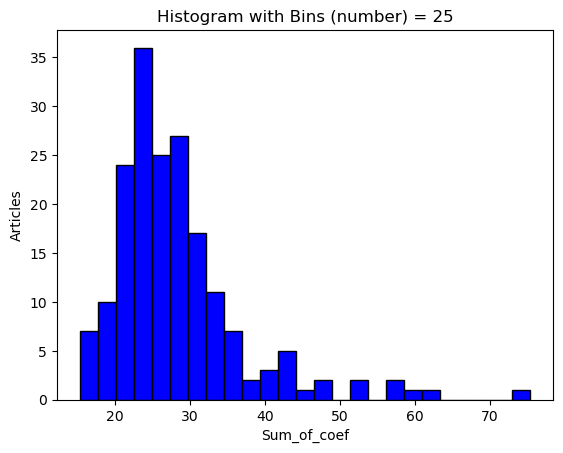

In [14]:
print_cat_dist_1("Natural language processing", "NLP_distances_result")

In [15]:
def print_cat_main_closest (name, name_json):
    print("Category name: " + name + "\n")
    print("Main articles: ")
    list_art = ()
    list_art = main_art(name)
    x = art_sum_dist(name_json)
    for i in range(len(list_art)):
        print(list_art[i] + " -  ")
        for j in x:
            if (j[1] == list_art[i]):
                print(str(j[2]))
    print("\nClosest article: ")
    for i in x:
        if i[2] > 50.:
            print(i[1] + " - " + str(i[2]))

In [16]:
print_cat_main_closest("Natural language processing", "NLP_distances_result")

Category name: Natural language processing

Main articles: 
Natural language processing -  
59.09515334424191

Closest article: 
Natural language processing - 59.09515334424191
Outline of natural language processing - 75.43989786158028
Automatic summarization - 57.87722799491215
Latent semantic analysis - 57.529597318651746
Text mining - 53.48883811697514
Triphone - 52.399999999999984
Word-sense disambiguation - 61.08059677413952
